Project Name - Iris Classification
Lets Begin

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
# Import evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

In [120]:
# Library used for data preprocessing
from sklearn.preprocessing import LabelEncoder

In [121]:
# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold

In [122]:
# Library used for ML Model implementation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

In [123]:
# Library used to ignore warnings
import warnings
warnings.filterwarnings('ignore')
# %matplotlib inline  # commented out to keep script-compatible

In [124]:

#load Dataset (try user's filepath, otherwise fall back to sklearn's iris loader)
import os
try:
    df = pd.read_csv(r'C:/Users/Hp/Downloads/Iris.csv')
    print('Loaded dataset from C:/Users/Hp/Downloads/Iris.csv')
except Exception as e:
    print('Could not load local CSV ({}). Falling back to sklearn.datasets.load_iris'.format(e))
    from sklearn.datasets import load_iris
    iris = load_iris()
    import numpy as np
    df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['Species'])
    # convert numeric target to names for readability
    df['Species'] = pd.Categorical.from_codes(iris['target'], iris['target_names'])
    print('Loaded sklearn iris dataset with shape', df.shape)


Loaded dataset from C:/Users/Hp/Downloads/Iris.csv


In [125]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [126]:
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  150
Number of columns are:  5


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [128]:
#Duplicate values
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 3


In [129]:
#Missing values/Null Values Count
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [130]:
#dataset columns
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [131]:
#Describe Dataset
df.describe(include='all').round(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.00,150.00,150.00,150.00,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.84,3.05,3.76,1.20,NaN
std,0.83,0.43,1.76,0.76,NaN
min,4.30,2.00,1.00,0.10,NaN
25%,5.10,2.80,1.60,0.30,NaN
50%,5.80,3.00,4.35,1.30,NaN
75%,6.40,3.30,5.10,1.80,NaN


In [132]:
#Check Unique Values 
for i in df.columns.tolist():
    print("No. of unique values in ",i,"is",df[i].nunique())


No. of unique values in  SepalLengthCm is 35
No. of unique values in  SepalWidthCm is 23
No. of unique values in  PetalLengthCm is 43
No. of unique values in  PetalWidthCm is 22
No. of unique values in  Species is 3


Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

Chart 1 - Distribution of Numerical Variables

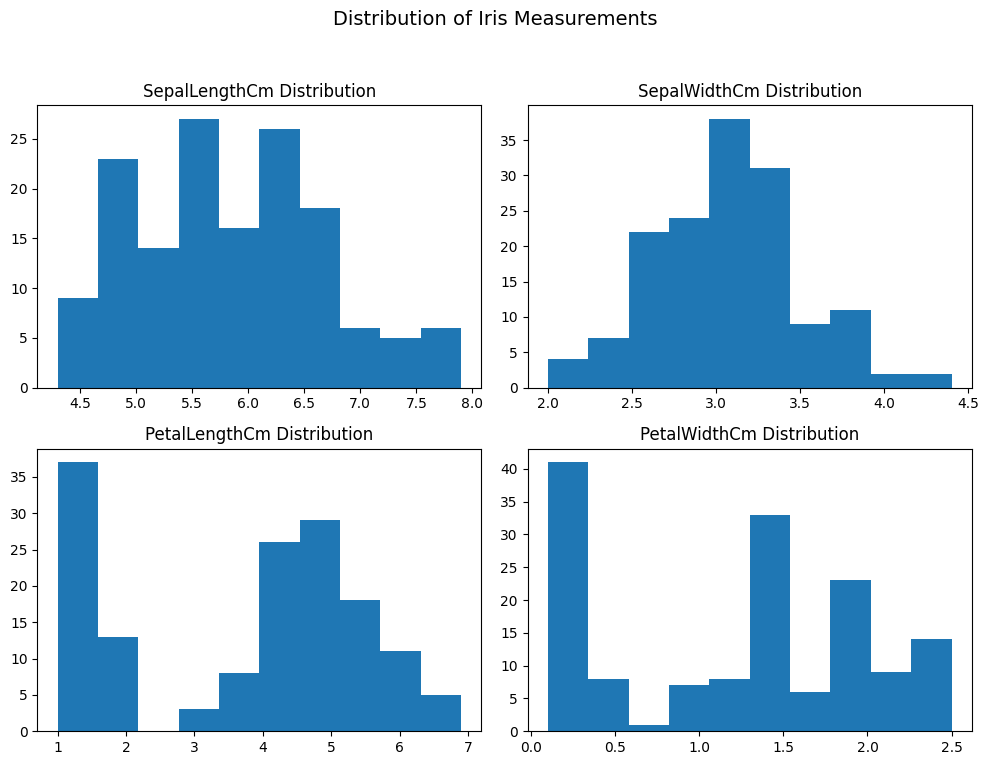

In [133]:
# Chart - 1 Histogram visualization code for distribution of numerical variables
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
plt.figure(figsize=(10,8))
plt.suptitle('Distribution of Iris Measurements', fontsize=14)

# Plot histograms for up to first 4 numeric columns
for i, col in enumerate(numeric_cols[:4], 1):
    plt.subplot(2,2,i)
    plt.hist(df[col])
    plt.title(f'{col} Distribution')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Chart 2 - Sepal Length vs Sepal Width

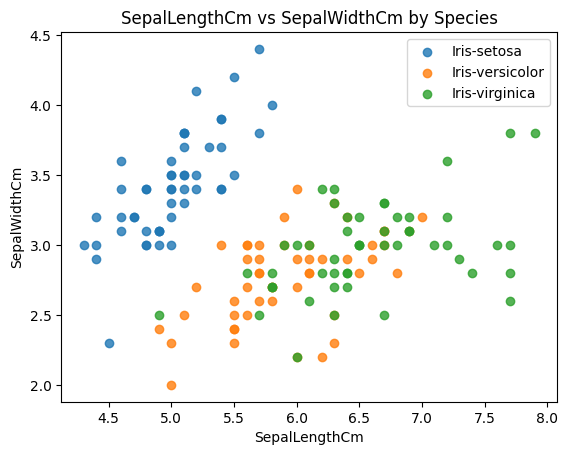

In [134]:
# Chart -2 Scatter plot visualisation code for Sepal Length vs Sepal Width
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
if len(numeric_cols) >= 2:
    xcol, ycol = numeric_cols[0], numeric_cols[1]
else:
    xcol, ycol = numeric_cols[0], numeric_cols[0]

species = df['Species'].unique()
colors = sns.color_palette(n_colors=len(species))

for i, sp in enumerate(species):
    subset = df[df['Species'] == sp]
    plt.scatter(subset[xcol], subset[ycol], label=str(sp), alpha=0.8)

plt.xlabel(xcol)
plt.ylabel(ycol)
plt.title(f'{xcol} vs {ycol} by Species')
plt.legend()
plt.show()


Chart - 3 : Petal Length vs Petal Width

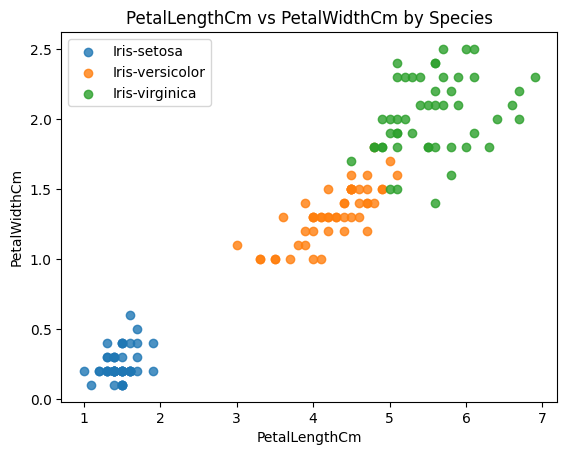

In [135]:
# Chart - 3 Scatter plot visualization code for Petal Length vs Petal Width.
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
if len(numeric_cols) >= 4:
    xcol, ycol = numeric_cols[2], numeric_cols[3]
else:
    xcol, ycol = numeric_cols[0], numeric_cols[1]

species = df['Species'].unique()
colors = sns.color_palette(n_colors=len(species))

for i, sp in enumerate(species):
    subset = df[df['Species'] == sp]
    plt.scatter(subset[xcol], subset[ycol], label=str(sp), alpha=0.8)

plt.xlabel(xcol)
plt.ylabel(ycol)
plt.title(f'{xcol} vs {ycol} by Species')
plt.legend()
plt.show()


Chart - 4 : Sepal Length vs Petal Length

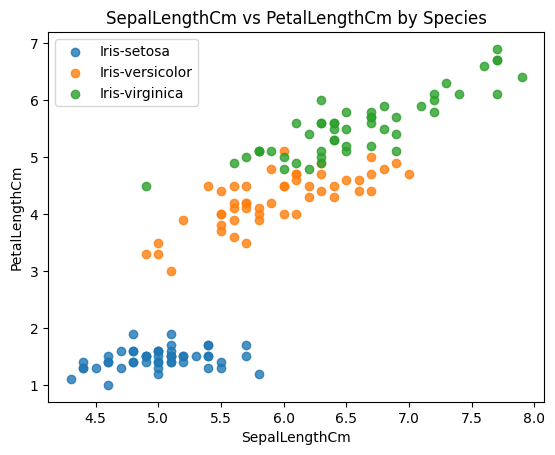

In [136]:
# Chart - 4 Scatter plot visualisation code for first vs third numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
if len(numeric_cols) >= 3:
    xcol, ycol = numeric_cols[0], numeric_cols[2]
else:
    xcol, ycol = numeric_cols[0], numeric_cols[1]

species = df['Species'].unique()
colors = sns.color_palette(n_colors=len(species))

for i, sp in enumerate(species):
    subset = df[df['Species'] == sp]
    plt.scatter(subset[xcol], subset[ycol], label=str(sp), alpha=0.8)

plt.xlabel(xcol)
plt.ylabel(ycol)
plt.title(f'{xcol} vs {ycol} by Species')
plt.legend()
plt.show()


Chart - 5 : Sepal Width vs Petal Width

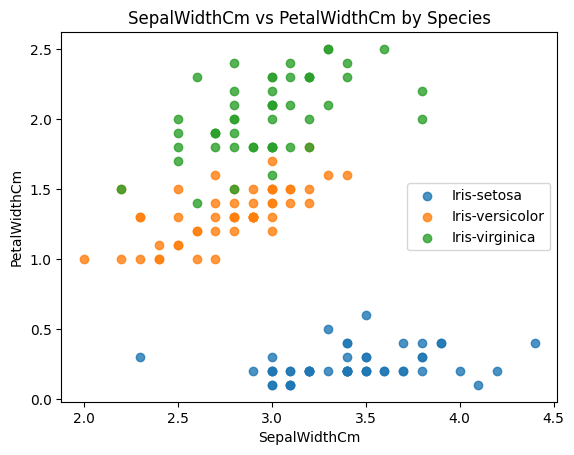

In [137]:
# Chart - 5 Scatter plot visualization code for Sepal Width vs Petal Width.
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
if len(numeric_cols) >= 4:
    xcol, ycol = numeric_cols[1], numeric_cols[3]
else:
    xcol, ycol = numeric_cols[0], numeric_cols[1]

species = df['Species'].unique()
colors = sns.color_palette(n_colors=len(species))

for i, sp in enumerate(species):
    subset = df[df['Species'] == sp]
    plt.scatter(subset[xcol], subset[ycol], label=str(sp), alpha=0.8)

plt.xlabel(xcol)
plt.ylabel(ycol)
plt.title(f'{xcol} vs {ycol} by Species')
plt.legend()
plt.show()


Chart - 6 Correlation Heatmap

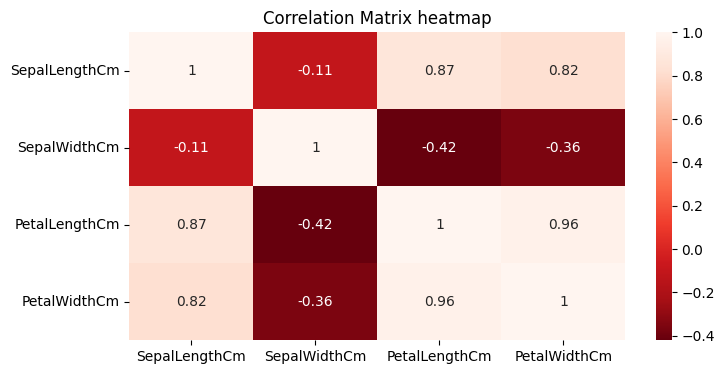

In [138]:
# Correlation Heatmap Visualization code 
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
corr_matrix = df[numeric_cols].corr()

#Plot Heatmap 
plt.figure(figsize=(8,4))
sns.heatmap(corr_matrix, annot=True, cmap='Reds_r')

#Setting Labels
plt.title('Correlation Matrix heatmap')

#Display Chart
plt.show()


5. Feature Engineering & Data Pre-processing



Categorical Encoding

In [139]:
#Encode the categorical columns
#create a LabelEncoder object
le = LabelEncoder()

#Encode the species column to convert the species names to numerical labels
df['Species'] = le.fit_transform(df['Species'])

#Check the unique values in the species column after encoding
unique_species = df['Species'].unique

#Display the unique encoded values
print("Encoded Species Values:")
print(unique_species) #'Iris-setosa' == 0, 'Iris-versicolor' == 1, 'Iris-virginica' == 2

Encoded Species Values:
<bound method Series.unique of 0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64>


2. Data Scaling 

In [140]:
x=df.drop(columns=['Species'], axis=1)
y=df['Species']

3. Data Splitting

In [141]:
#Splitting the data to train and test
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3)

#Checking the train distribution of dependent variable
y_train.value_counts()

Species
2    37
1    34
0    34
Name: count, dtype: int64

ML Model Implementation

In [142]:

def evaluate_model(model, x_train, x_test, y_train, y_test):
    """Train model, predict, and return a list of key metrics.
    Returns: [precision_train, precision_test, recall_train, recall_test, accuracy_train, accuracy_test, f1_train, f1_test]
    """
    # Fit the model
    model.fit(x_train, y_train)

    # Predictions
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # Confusion matrices
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    # Plot confusion matrices side-by-side
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    sns.heatmap(cm_train, annot=True, fmt='d', ax=ax[0])
    ax[0].set_title('Confusion Matrix - Train')
    sns.heatmap(cm_test, annot=True, fmt='d', ax=ax[1])
    ax[1].set_title('Confusion Matrix - Test')
    plt.show()

    # Classification reports as dicts (works for binary & multiclass)
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)

    # Weighted averages (safe for multiclass)
    precision_train = cr_train.get('weighted avg', cr_train.get('macro avg', {})).get('precision', None)
    precision_test  = cr_test.get('weighted avg', cr_test.get('macro avg', {})).get('precision', None)
    recall_train    = cr_train.get('weighted avg', cr_train.get('macro avg', {})).get('recall', None)
    recall_test     = cr_test.get('weighted avg', cr_test.get('macro avg', {})).get('recall', None)
    f1_train        = cr_train.get('weighted avg', cr_train.get('macro avg', {})).get('f1-score', None)
    f1_test         = cr_test.get('weighted avg', cr_test.get('macro avg', {})).get('f1-score', None)

    # Accuracy
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test  = accuracy_score(y_test, y_pred_test)

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, f1_train, f1_test]

    # Optionally print human-readable summary
    print('Train -> accuracy: {:.4f}, precision (weighted): {:.4f}, recall (weighted): {:.4f}, f1 (weighted): {:.4f}'.format(
        acc_train, precision_train, recall_train, f1_train))
    print('Test  -> accuracy: {:.4f}, precision (weighted): {:.4f}, recall (weighted): {:.4f}, f1 (weighted): {:.4f}'.format(
        acc_test, precision_test, recall_test, f1_test))

    return model_score


In [143]:
#create a score dataframe
score = pd.DataFrame(index=['Precision Train', 'Precision Test', 'Recall Train', 'Recall Test', 'Accuracy Train', 'Accuracy Test', 'f1 macro Train', 'f1 macro Test'])

ML Model - 1 : Logistic regression

In [144]:
#ML Model - 1 Implementation
lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)

Explain the ML Model used and it's performance using Evaluation metric Score Chart

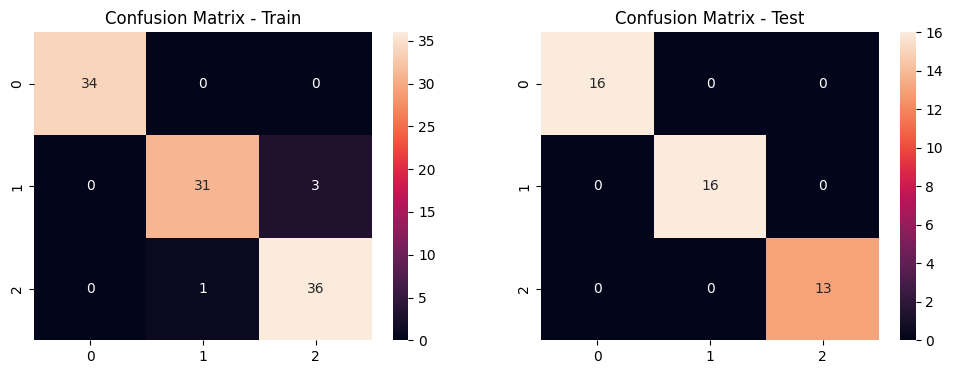

Train -> accuracy: 0.9619, precision (weighted): 0.9628, recall (weighted): 0.9619, f1 (weighted): 0.9618
Test  -> accuracy: 1.0000, precision (weighted): 1.0000, recall (weighted): 1.0000, f1 (weighted): 1.0000


In [145]:
lr_score = evaluate_model(lr_model, x_train, x_test, y_train, y_test)

In [146]:
# Updated Evaluation metric Score Chart
score['Logistic regression'] = lr_score
score

,Logistic regression
Precision Train,0.962775
Precision Test,1.000000
Recall Train,0.961905
Recall Test,1.000000
Accuracy Train,0.961905
Accuracy Test,1.000000
f1 macro Train,0.961829
f1 macro Test,1.000000


2. Cross Validation and Hyperparameter testing

In [147]:
#ML Model - 1 Implementation with hyperparameter optimization techniques (Gridsearch CV, RandomSearch CV, Bayesian Optimization etc)
# Define the hyperparameter grid 
param_grid = {'C':[100,10,1,0.1,0.01,0.001,0.0001],
              'penalty' : ['l1', 'l2'],
              'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

#Initialising the logistic regression model
logreg = LogisticRegression(fit_intercept=True, max_iter=1000, random_state=0)

#Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=4, random_state=0)

#Using GridSearchCV to tune the hyperparameters using cross validation
grid = GridSearchCV(logreg, param_grid, cv=rskf)
grid.fit(x_train, y_train)

#Select the best hyperparameters found by GridSearchCV
best_params = grid.best_params_
print("Best hyperparaameters: ", best_params)


Best hyperparaameters:  {'C': 10, 'penalty': 'l2', 'solver': 'saga'}


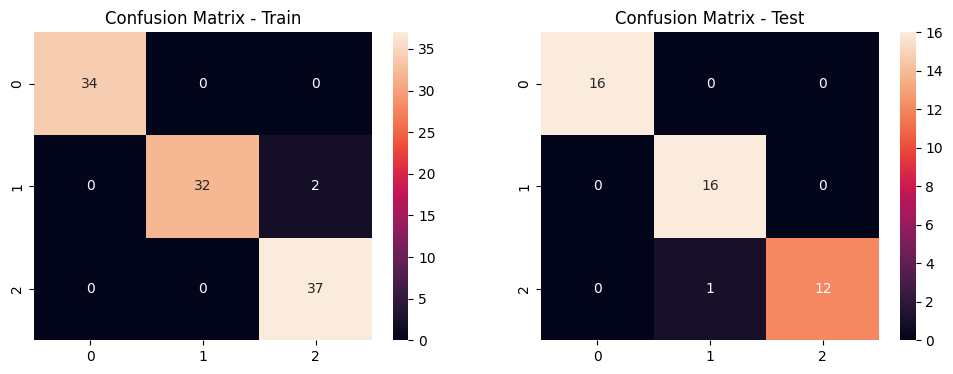

Train -> accuracy: 0.9810, precision (weighted): 0.9819, recall (weighted): 0.9810, f1 (weighted): 0.9809
Test  -> accuracy: 0.9778, precision (weighted): 0.9791, recall (weighted): 0.9778, f1 (weighted): 0.9777


In [148]:
#Initiate model with best parameters
lr_model2 = LogisticRegression(C=best_params['C'],
                               penalty=best_params['penalty'],
                               solver=best_params['solver'],
                               max_iter=10000, random_state=0)

#Visualizing evaluation Mteric Score chart
lr_score2 = evaluate_model(lr_model2, x_train, x_test, y_train, y_test)

In [149]:
score['Logistic regression tuned'] = lr_score2

In [150]:
# Updated Evaluation metric Score Chart
score

,Logistic regression,Logistic regression tuned
Precision Train,0.962775,0.981929
Precision Test,1.000000,0.979085
Recall Train,0.961905,0.980952
Recall Test,1.000000,0.977778
Accuracy Train,0.961905,0.980952
Accuracy Test,1.000000,0.977778
f1 macro Train,0.961829,0.980914
f1 macro Test,1.000000,0.977670


ML Model 2 - Decision Tree

In [151]:
#ML Model -2 Implementation
dt_model = DecisionTreeClassifier(random_state=20)

#Model is trained fit and predicted in the evaluate model

1 Explain the NL Nodel used and its performance using Evaluation metric Score Chart

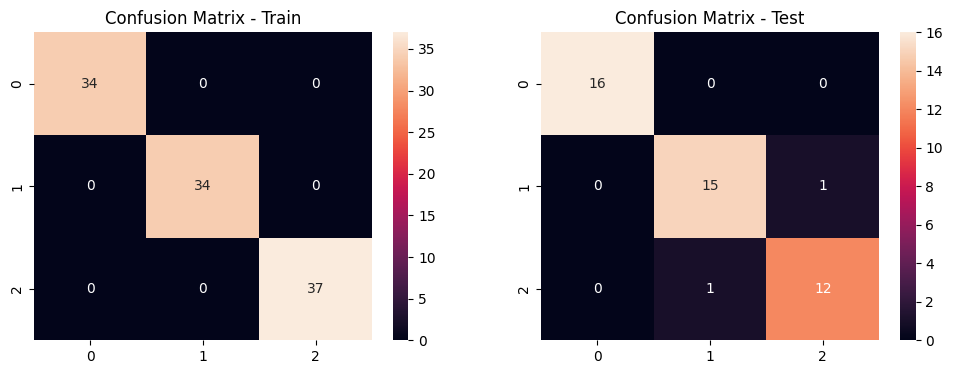

Train -> accuracy: 1.0000, precision (weighted): 1.0000, recall (weighted): 1.0000, f1 (weighted): 1.0000
Test  -> accuracy: 0.9556, precision (weighted): 0.9556, recall (weighted): 0.9556, f1 (weighted): 0.9556


In [152]:
#Visualising Evaluation Metric Score Chart
dt_score = evaluate_model(dt_model, x_train, x_test, y_train, y_test)

In [153]:
#Updated Evaluation metric Score Chart
score['Decision Tree'] = dt_score
score

,Logistic regression,Logistic regression tuned,Decision Tree
Precision Train,0.962775,0.981929,1.000000
Precision Test,1.000000,0.979085,0.955556
Recall Train,0.961905,0.980952,1.000000
Recall Test,1.000000,0.977778,0.955556
Accuracy Train,0.961905,0.980952,1.000000
Accuracy Test,1.000000,0.977778,0.955556
f1 macro Train,0.961829,0.980914,1.000000
f1 macro Test,1.000000,0.977670,0.955556


2. Cross-Validation and Hyperparameter Tuning

In [154]:
#ML Model - 1 Implementation with hyperparameter optimization techniques (Gridsearch CV, RandomSearch CV, Bayesian Optimization etc)
# Define the hyperparameter grid
grid = {'max_depth' : [3,4,5,6,7,8],
        'min_samples_split' : np.arange(2,8),
        'min_samples_leaf' : np.arange(10,20)}

#Initialise the model
model = DecisionTreeClassifier()

#repeated Stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

#Initialise GridSearchCV
grid_search = GridSearchCV(model, grid, cv=rskf)

#Fit the GridSearcCV to the training data
grid_search.fit(x_train, y_train)

#Select the best hyperparameters
best_params = grid_search.best_params_
print("best hyperparameters: ", best_params)

best hyperparameters:  {'max_depth': 3, 'min_samples_leaf': np.int64(10), 'min_samples_split': np.int64(2)}


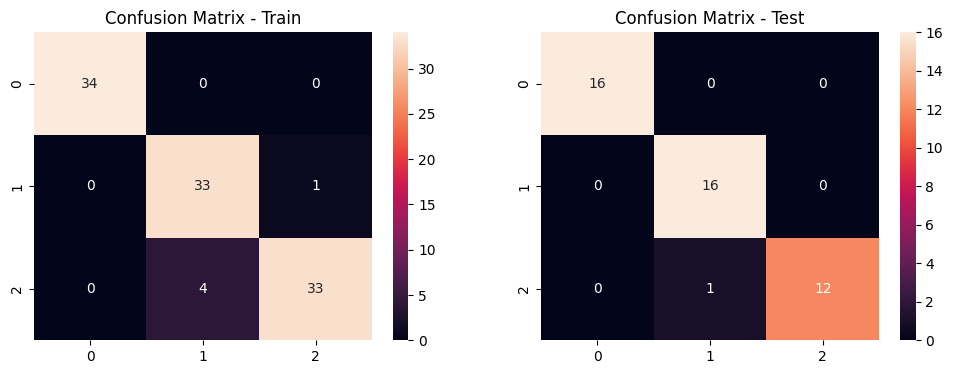

Train -> accuracy: 0.9524, precision (weighted): 0.9546, recall (weighted): 0.9524, f1 (weighted): 0.9524
Test  -> accuracy: 0.9778, precision (weighted): 0.9791, recall (weighted): 0.9778, f1 (weighted): 0.9777


In [155]:
#Train a new model with the best hyperparametetrs
dt_model2 = DecisionTreeClassifier(max_depth=best_params['max_depth'],
                                   min_samples_leaf=best_params['min_samples_leaf'],
                                   min_samples_split=best_params['min_samples_split'],
                                   random_state=20)

#Visualizing evaluation Metric Score Chart
dt2_score = evaluate_model(dt_model2, x_train, x_test, y_train, y_test)

In [156]:
score['Decision Tree tuned'] = dt2_score

In [157]:
#Updated Evaluation metric score chart
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned
Precision Train,0.962775,0.981929,1.000000,0.954629
Precision Test,1.000000,0.979085,0.955556,0.979085
Recall Train,0.961905,0.980952,1.000000,0.952381
Recall Test,1.000000,0.977778,0.955556,0.977778
Accuracy Train,0.961905,0.980952,1.000000,0.952381
Accuracy Test,1.000000,0.977778,0.955556,0.977778
f1 macro Train,0.961829,0.980914,1.000000,0.952381
f1 macro Test,1.000000,0.977670,0.955556,0.977670


ML Model 3 - Random Forest

In [158]:
#ML Model - 3 Implementation
rf_model = RandomForestClassifier(random_state=0)

#Model is trained (fit) and prdicted in the evaluate model

1 Explain the NL Nodel used and its performance using Evaluation metric Score Chart

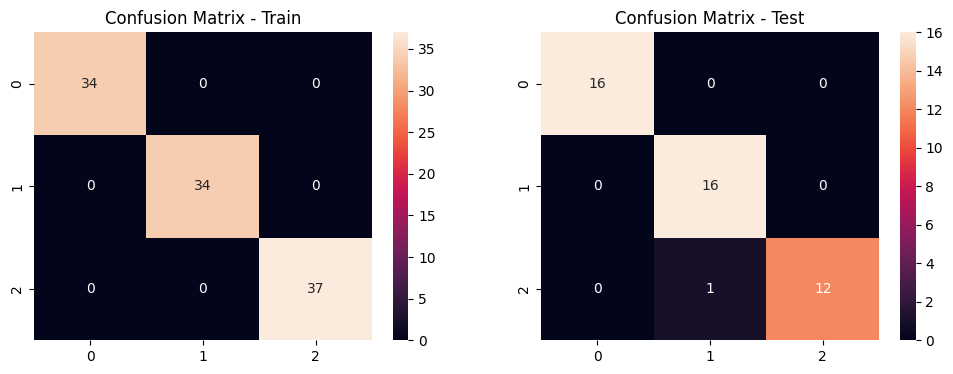

Train -> accuracy: 1.0000, precision (weighted): 1.0000, recall (weighted): 1.0000, f1 (weighted): 1.0000
Test  -> accuracy: 0.9778, precision (weighted): 0.9791, recall (weighted): 0.9778, f1 (weighted): 0.9777


In [159]:
#Visualizing evaluation metric score chart
rf_score = evaluate_model(rf_model, x_train, x_test, y_train, y_test)

In [160]:
#updated Evaluation Metric score chart
score['Random Forest'] = rf_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest
Precision Train,0.962775,0.981929,1.000000,0.954629,1.000000
Precision Test,1.000000,0.979085,0.955556,0.979085,0.979085
Recall Train,0.961905,0.980952,1.000000,0.952381,1.000000
Recall Test,1.000000,0.977778,0.955556,0.977778,0.977778
Accuracy Train,0.961905,0.980952,1.000000,0.952381,1.000000
Accuracy Test,1.000000,0.977778,0.955556,0.977778,0.977778
f1 macro Train,0.961829,0.980914,1.000000,0.952381,1.000000
f1 macro Test,1.000000,0.977670,0.955556,0.977670,0.977670


2. Cross- Validation & Hyperparameter Tuning

In [161]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
grid = {'n_estimators': [10,50,100,200],
        'max_depth': [8,9,10,11,12,13,14,15],
        'min_samples_split': [2,3,4,5]}

#Initialize the model
rf = RandomForestClassifier(random_state=0)

#Repeated Stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

#Initialise RandomSeachCV
random_search = RandomizedSearchCV(rf, grid, cv=rskf, n_iter=10, n_jobs=-1)

#Fit the RandomSeachCV to the training data
random_search.fit(x_train, y_train)

#Select the best hyperparameters
best_params = random_search.best_params_
print("best hyperparameters: ", best_params)


best hyperparameters:  {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 12}


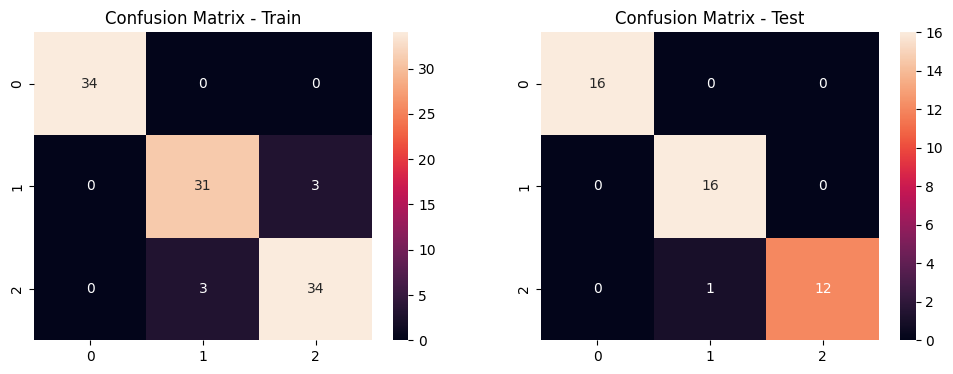

Train -> accuracy: 0.9429, precision (weighted): 0.9429, recall (weighted): 0.9429, f1 (weighted): 0.9429
Test  -> accuracy: 0.9778, precision (weighted): 0.9791, recall (weighted): 0.9778, f1 (weighted): 0.9777


In [162]:
#Initialize model qith best parameters 
rf_model2 = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                                   min_samples_leaf= best_params['min_samples_split'],
                                   max_depth= best_params['max_depth'],
                                   random_state=0)

#Visualizing evaluation matric Score Chart
rf2_score = evaluate_model(rf_model2, x_train, x_test, y_train, y_test)

In [163]:
score['Random Forest tuned'] = rf2_score


In [164]:
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned
Precision Train,0.962775,0.981929,1.000000,0.954629,1.000000,0.942857
Precision Test,1.000000,0.979085,0.955556,0.979085,0.979085,0.979085
Recall Train,0.961905,0.980952,1.000000,0.952381,1.000000,0.942857
Recall Test,1.000000,0.977778,0.955556,0.977778,0.977778,0.977778
Accuracy Train,0.961905,0.980952,1.000000,0.952381,1.000000,0.942857
Accuracy Test,1.000000,0.977778,0.955556,0.977778,0.977778,0.977778
f1 macro Train,0.961829,0.980914,1.000000,0.952381,1.000000,0.942857
f1 macro Test,1.000000,0.977670,0.955556,0.977670,0.977670,0.977670


ML Model - 4 : SVM (Support Vector Machine)

In [165]:
#ML Model 4 Implementation
svm_model = SVC(kernel='linear', random_state=0, probability=True)

#Model is trained (fit) and predicted in the evaluate model.

Explain the ML Model and its performance using Evaluation Metric Score Chart

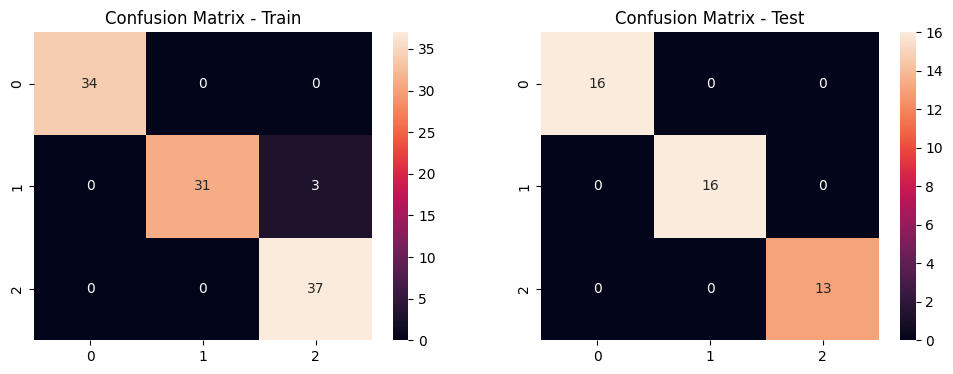

Train -> accuracy: 0.9714, precision (weighted): 0.9736, recall (weighted): 0.9714, f1 (weighted): 0.9713
Test  -> accuracy: 1.0000, precision (weighted): 1.0000, recall (weighted): 1.0000, f1 (weighted): 1.0000


In [166]:
#Visualizing evaluation metric score chart
svm_score = evaluate_model(svm_model, x_train, x_test, y_train, y_test)

In [167]:
#Updated Evaluation metric Score Chart
score['SVM'] = svm_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM
Precision Train,0.962775,0.981929,1.000000,0.954629,1.000000,0.942857,0.973571
Precision Test,1.000000,0.979085,0.955556,0.979085,0.979085,0.979085,1.000000
Recall Train,0.961905,0.980952,1.000000,0.952381,1.000000,0.942857,0.971429
Recall Test,1.000000,0.977778,0.955556,0.977778,0.977778,0.977778,1.000000
Accuracy Train,0.961905,0.980952,1.000000,0.952381,1.000000,0.942857,0.971429
Accuracy Test,1.000000,0.977778,0.955556,0.977778,0.977778,0.977778,1.000000
f1 macro Train,0.961829,0.980914,1.000000,0.952381,1.000000,0.942857,0.971326
f1 macro Test,1.000000,0.977670,0.955556,0.977670,0.977670,0.977670,1.000000


2. Cross Validation and Hyperparameter tuning

In [168]:
# ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'C': np.arange(0.1, 10, 0.1),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'degree': np.arange(2, 6, 1)}

# Initialize the model
svm = SVC(random_state=0, probability=True)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV with kfold cross-validation
random_search = RandomizedSearchCV(svm, param_grid, n_iter=10, cv=rskf, n_jobs=-1)

# Fit the RandomizedSearchCV to the training data
random_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'kernel': 'linear', 'degree': np.int64(2), 'C': np.float64(3.9000000000000004)}


In [169]:
#Initialise model with best parameters
svm_model2 = SVC(C = best_params['C'],
                 kernel = best_params['kernel'],
                 degree = best_params['degree'],
                 random_state=0, probability=True)

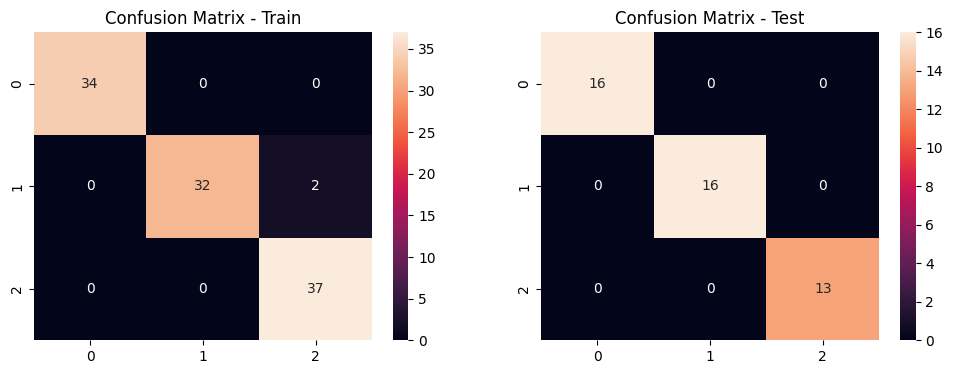

Train -> accuracy: 0.9810, precision (weighted): 0.9819, recall (weighted): 0.9810, f1 (weighted): 0.9809
Test  -> accuracy: 1.0000, precision (weighted): 1.0000, recall (weighted): 1.0000, f1 (weighted): 1.0000


In [170]:
#Visualizing evaluation metric Score Chart
svm2_score = evaluate_model(svm_model2, x_train, x_test, y_train, y_test) 

In [171]:
score['SVM tuned'] = svm2_score

In [172]:
#Updated Evaluation metric score chart
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned
Precision Train,0.962775,0.981929,1.000000,0.954629,1.000000,0.942857,0.973571,0.981929
Precision Test,1.000000,0.979085,0.955556,0.979085,0.979085,0.979085,1.000000,1.000000
Recall Train,0.961905,0.980952,1.000000,0.952381,1.000000,0.942857,0.971429,0.980952
Recall Test,1.000000,0.977778,0.955556,0.977778,0.977778,0.977778,1.000000,1.000000
Accuracy Train,0.961905,0.980952,1.000000,0.952381,1.000000,0.942857,0.971429,0.980952
Accuracy Test,1.000000,0.977778,0.955556,0.977778,0.977778,0.977778,1.000000,1.000000
f1 macro Train,0.961829,0.980914,1.000000,0.952381,1.000000,0.942857,0.971326,0.980914
f1 macro Test,1.000000,0.977670,0.955556,0.977670,0.977670,0.977670,1.000000,1.000000


ML Model 5 - Xtreme Gradient Boosting

In [173]:
#ML Model 5 Implementation
xgb_model = xgb.XGBClassifier()

#Model is trained fit and predicted in the evaluate model

1. Explain the ML Model and its performance using Evaluation Metric Score Chart

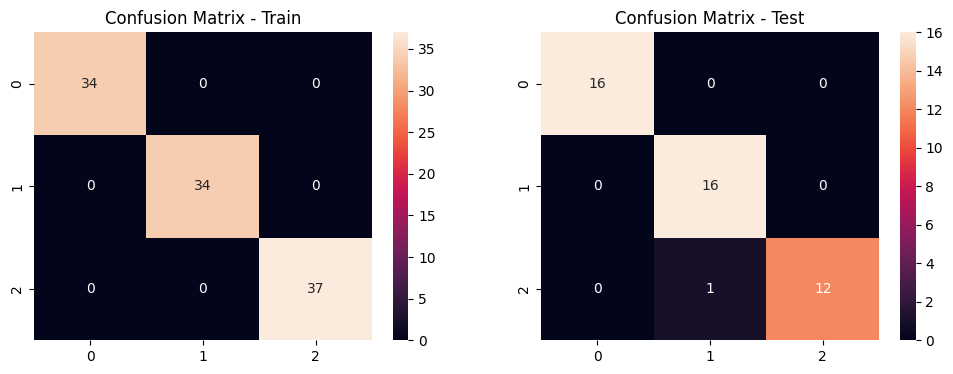

Train -> accuracy: 1.0000, precision (weighted): 1.0000, recall (weighted): 1.0000, f1 (weighted): 1.0000
Test  -> accuracy: 0.9778, precision (weighted): 0.9791, recall (weighted): 0.9778, f1 (weighted): 0.9777


In [174]:
#Visualising evaluation metric score chart
xgb_score = evaluate_model(xgb_model, x_train, x_test, y_train, y_test)

In [175]:
#Updated Evaluation Metric score chart
score['XGB'] = xgb_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB
Precision Train,0.962775,0.981929,1.000000,0.954629,1.000000,0.942857,0.973571,0.981929,1.000000
Precision Test,1.000000,0.979085,0.955556,0.979085,0.979085,0.979085,1.000000,1.000000,0.979085
Recall Train,0.961905,0.980952,1.000000,0.952381,1.000000,0.942857,0.971429,0.980952,1.000000
Recall Test,1.000000,0.977778,0.955556,0.977778,0.977778,0.977778,1.000000,1.000000,0.977778
Accuracy Train,0.961905,0.980952,1.000000,0.952381,1.000000,0.942857,0.971429,0.980952,1.000000
Accuracy Test,1.000000,0.977778,0.955556,0.977778,0.977778,0.977778,1.000000,1.000000,0.977778
f1 macro Train,0.961829,0.980914,1.000000,0.952381,1.000000,0.942857,0.971326,0.980914,1.000000
f1 macro Test,1.000000,0.977670,0.955556,0.977670,0.977670,0.977670,1.000000,1.000000,0.977670


2. Cross Validation and Hyperparameter testing

In [176]:
# ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'learning_rate' : np.arange(0.01, 0.3, 0.01),
              'max_depth': np.arange(3, 15, 1),
              'n_estimators': np.arange(100, 200, 10)}

#Initialise the model
xgb2 = xgb.XGBClassifier(random_state=0)

#Repeated Stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

#Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(xgb2, param_grid, n_iter=10, cv=rskf)

#Fit the RandomizedSearchCV to the training data
random_search.fit(x_train, y_train)

#Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'n_estimators': np.int64(100), 'max_depth': np.int64(3), 'learning_rate': np.float64(0.18000000000000002)}


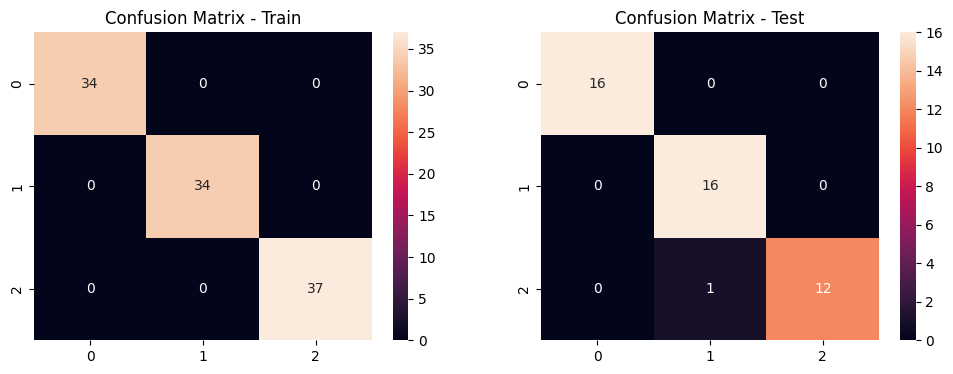

Train -> accuracy: 1.0000, precision (weighted): 1.0000, recall (weighted): 1.0000, f1 (weighted): 1.0000
Test  -> accuracy: 0.9778, precision (weighted): 0.9791, recall (weighted): 0.9778, f1 (weighted): 0.9777


In [177]:
#Initialize model with best parameters
xgb_model2 = xgb.XGBClassifier(learniing_rate = best_params['learning_rate'],
                               max_depth = best_params['max_depth'],
                               n_estimators = best_params['n_estimators'],
                               random_state=0)

#Visualizing evaluation metric score chart
xgb2_score = evaluate_model(xgb_model2, x_train, x_test, y_train, y_test)

In [178]:
#Updated Evaluation metric score chart
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB
Precision Train,0.962775,0.981929,1.000000,0.954629,1.000000,0.942857,0.973571,0.981929,1.000000
Precision Test,1.000000,0.979085,0.955556,0.979085,0.979085,0.979085,1.000000,1.000000,0.979085
Recall Train,0.961905,0.980952,1.000000,0.952381,1.000000,0.942857,0.971429,0.980952,1.000000
Recall Test,1.000000,0.977778,0.955556,0.977778,0.977778,0.977778,1.000000,1.000000,0.977778
Accuracy Train,0.961905,0.980952,1.000000,0.952381,1.000000,0.942857,0.971429,0.980952,1.000000
Accuracy Test,1.000000,0.977778,0.955556,0.977778,0.977778,0.977778,1.000000,1.000000,0.977778
f1 macro Train,0.961829,0.980914,1.000000,0.952381,1.000000,0.942857,0.971326,0.980914,1.000000
f1 macro Test,1.000000,0.977670,0.955556,0.977670,0.977670,0.977670,1.000000,1.000000,0.977670


ML Model 6 : Naive Bayes

In [179]:
#ML Model 6 Implementation
nb_model = GaussianNB()

#Model is trained fit and predicted in the evaluate model

1. Explain the ML Model used and its performance using Evaluation metric score chart

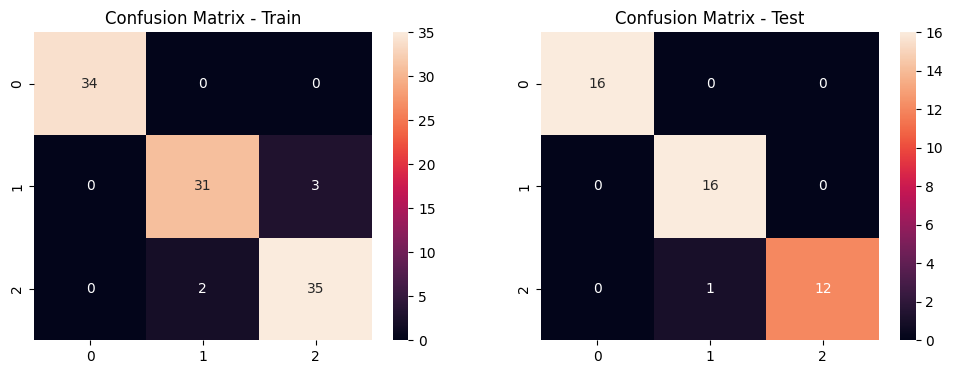

Train -> accuracy: 0.9524, precision (weighted): 0.9526, recall (weighted): 0.9524, f1 (weighted): 0.9523
Test  -> accuracy: 0.9778, precision (weighted): 0.9791, recall (weighted): 0.9778, f1 (weighted): 0.9777


In [180]:
#Visualizing evaluation metric score chart
nb_score = evaluate_model(nb_model, x_train, x_test, y_train, y_test)

In [181]:
#Updated Evaluation metric score chart
score['Naive Bayes'] = nb_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,Naive Bayes
Precision Train,0.962775,0.981929,1.000000,0.954629,1.000000,0.942857,0.973571,0.981929,1.000000,0.952556
Precision Test,1.000000,0.979085,0.955556,0.979085,0.979085,0.979085,1.000000,1.000000,0.979085,0.979085
Recall Train,0.961905,0.980952,1.000000,0.952381,1.000000,0.942857,0.971429,0.980952,1.000000,0.952381
Recall Test,1.000000,0.977778,0.955556,0.977778,0.977778,0.977778,1.000000,1.000000,0.977778,0.977778
Accuracy Train,0.961905,0.980952,1.000000,0.952381,1.000000,0.942857,0.971429,0.980952,1.000000,0.952381
Accuracy Test,1.000000,0.977778,0.955556,0.977778,0.977778,0.977778,1.000000,1.000000,0.977778,0.977778
f1 macro Train,0.961829,0.980914,1.000000,0.952381,1.000000,0.942857,0.971326,0.980914,1.000000,0.952343
f1 macro Test,1.000000,0.977670,0.955556,0.977670,0.977670,0.977670,1.000000,1.000000,0.977670,0.977670


2. Cross Validation and Hyperparameter Tuning

In [182]:
#ML Model - 6 Implementation with hyperparameter optimization techniques(GridSearchCV, RandomSearchCV, Bayesian Optimization etc.)
#Define the hyperparameter grid
param_grid = {'var_smoothing': np.logspace(0, -9, num=100)}

#Initialise the model
naive = GaussianNB()

#Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=4, n_repeats=4, random_state=0)

#Initialise Grid SearchCV
GridSearch = GridSearchCV(naive, param_grid, cv=rskf, n_jobs=-1)

#Fit the GridSearchCV to the training data
GridSearch.fit(x_train, y_train)

#Select the best hyperparameters
best_params = GridSearch.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'var_smoothing': np.float64(0.01519911082952933)}


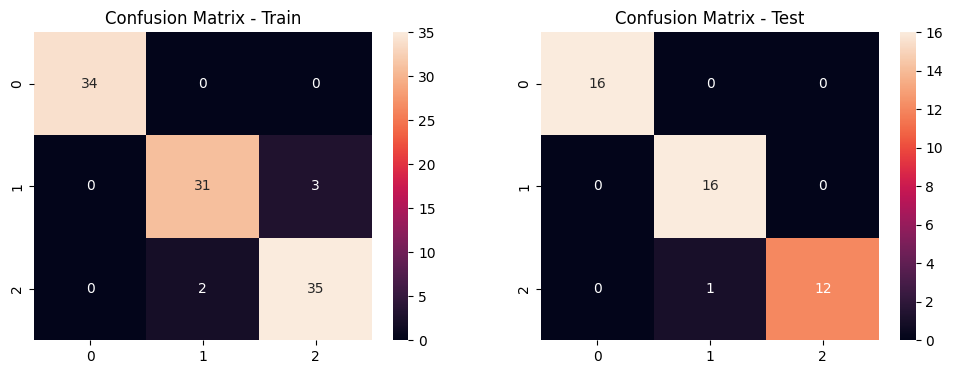

Train -> accuracy: 0.9524, precision (weighted): 0.9526, recall (weighted): 0.9524, f1 (weighted): 0.9523
Test  -> accuracy: 0.9778, precision (weighted): 0.9791, recall (weighted): 0.9778, f1 (weighted): 0.9777


In [183]:
#Initiate Model with best parameters
nb_model2 = GaussianNB(var_smoothing= best_params['var_smoothing'])

#Visualizing evaluation Metric Score Chart
nb2_score = evaluate_model(nb_model2, x_train, x_test, y_train, y_test)

In [184]:
score['Naive Bayes tuned'] = nb2_score

In [185]:
#Updated Evaluation Metric Score Chart
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,Naive Bayes,Naive Bayes tuned
Precision Train,0.962775,0.981929,1.000000,0.954629,1.000000,0.942857,0.973571,0.981929,1.000000,0.952556,0.952556
Precision Test,1.000000,0.979085,0.955556,0.979085,0.979085,0.979085,1.000000,1.000000,0.979085,0.979085,0.979085
Recall Train,0.961905,0.980952,1.000000,0.952381,1.000000,0.942857,0.971429,0.980952,1.000000,0.952381,0.952381
Recall Test,1.000000,0.977778,0.955556,0.977778,0.977778,0.977778,1.000000,1.000000,0.977778,0.977778,0.977778
Accuracy Train,0.961905,0.980952,1.000000,0.952381,1.000000,0.942857,0.971429,0.980952,1.000000,0.952381,0.952381
Accuracy Test,1.000000,0.977778,0.955556,0.977778,0.977778,0.977778,1.000000,1.000000,0.977778,0.977778,0.977778
f1 macro Train,0.961829,0.980914,1.000000,0.952381,1.000000,0.942857,0.971326,0.980914,1.000000,0.952343,0.952343
f1 macro Test,1.000000,0.977670,0.955556,0.977670,0.977670,0.977670,1.000000,1.000000,0.977670,0.977670,0.977670


ML Model - 7 : Neural Network

In [186]:
#ML Model 7 Implementation
nn_model = MLPClassifier(random_state=0)

#Model is trained fit and predicted in the evaluate model

1. Explain the ML Model used and its performance using Evaluation metric score chart

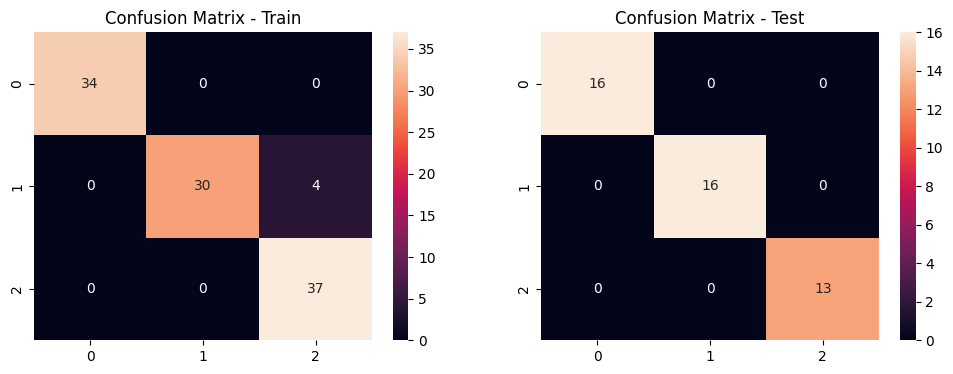

Train -> accuracy: 0.9619, precision (weighted): 0.9656, recall (weighted): 0.9619, f1 (weighted): 0.9617
Test  -> accuracy: 1.0000, precision (weighted): 1.0000, recall (weighted): 1.0000, f1 (weighted): 1.0000


In [187]:
#Visualizing evaluation metric score chart
neural_score = evaluate_model(nn_model, x_train, x_test, y_train, y_test)

In [188]:
#Updated Evaluation metric score chart
score['Neural Network'] = neural_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,Naive Bayes,Naive Bayes tuned,Neural Network
Precision Train,0.962775,0.981929,1.000000,0.954629,1.000000,0.942857,0.973571,0.981929,1.000000,0.952556,0.952556,0.965621
Precision Test,1.000000,0.979085,0.955556,0.979085,0.979085,0.979085,1.000000,1.000000,0.979085,0.979085,0.979085,1.000000
Recall Train,0.961905,0.980952,1.000000,0.952381,1.000000,0.942857,0.971429,0.980952,1.000000,0.952381,0.952381,0.961905
Recall Test,1.000000,0.977778,0.955556,0.977778,0.977778,0.977778,1.000000,1.000000,0.977778,0.977778,0.977778,1.000000
Accuracy Train,0.961905,0.980952,1.000000,0.952381,1.000000,0.942857,0.971429,0.980952,1.000000,0.952381,0.952381,0.961905
Accuracy Test,1.000000,0.977778,0.955556,0.977778,0.977778,0.977778,1.000000,1.000000,0.977778,0.977778,0.977778,1.000000
f1 macro Train,0.961829,0.980914,1.000000,0.952381,1.000000,0.942857,0.971326,0.980914,1.000000,0.952343,0.952343,0.961691
f1 macro Test,1.000000,0.977670,0.955556,0.977670,0.977670,0.977670,1.000000,1.000000,0.977670,0.977670,0.977670,1.000000


2. Cross Validation and hrperparameter testing

In [189]:
#ML Model 7 Implelementation with hyperparameter optimization techniques(GridSearchCV, RandomSeach CV, Bayesian Optimization)
#Define the hyperparameter grid
param_grid = {'hidden_layer_sizes': np.arange(10, 100, 10),
              'alpha': np.arange(0.0001, 0.01, 0.0001)}

#Initialize the model
neural = MLPClassifier(random_state=0)

#Repeated Stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

#Initialise RandomizedSearchCV
random_search = RandomizedSearchCV(neural, param_grid, n_iter=10, cv=rskf, n_jobs=-1)

#Fit the RandomizedSearchCV to the training data
random_search.fit(x_train, y_train)

#Select the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters: ", best_params)

Best Hyperparameters:  {'hidden_layer_sizes': np.int64(90), 'alpha': np.float64(0.0009000000000000001)}


In [190]:
#Initiate model with best parameters
nn_model2 = MLPClassifier(hidden_layer_sizes=best_params['hidden_layer_sizes'],
                         alpha = best_params['alpha'],
                         random_state=0)


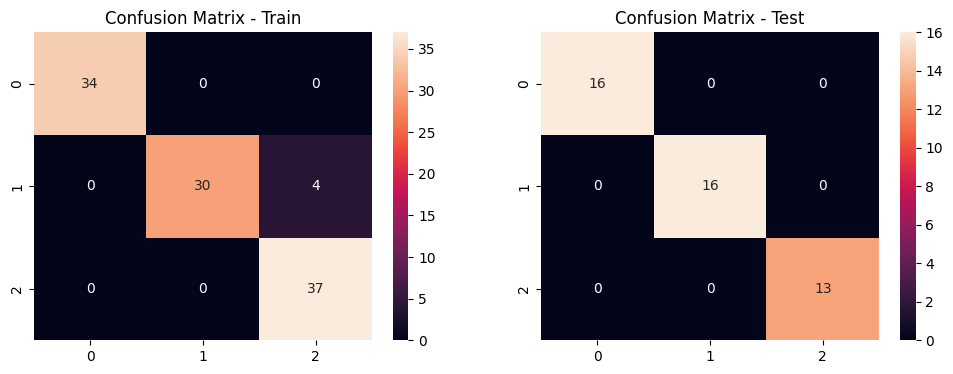

Train -> accuracy: 0.9619, precision (weighted): 0.9656, recall (weighted): 0.9619, f1 (weighted): 0.9617
Test  -> accuracy: 1.0000, precision (weighted): 1.0000, recall (weighted): 1.0000, f1 (weighted): 1.0000


In [191]:
#Visualizing evaluation metric score chart
neural2_score = evaluate_model(nn_model2, x_train, x_test, y_train, y_test)

In [192]:
score['Neural Network tuned'] = neural2_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,Naive Bayes,Naive Bayes tuned,Neural Network,Neural Network tuned
Precision Train,0.962775,0.981929,1.000000,0.954629,1.000000,0.942857,0.973571,0.981929,1.000000,0.952556,0.952556,0.965621,0.965621
Precision Test,1.000000,0.979085,0.955556,0.979085,0.979085,0.979085,1.000000,1.000000,0.979085,0.979085,0.979085,1.000000,1.000000
Recall Train,0.961905,0.980952,1.000000,0.952381,1.000000,0.942857,0.971429,0.980952,1.000000,0.952381,0.952381,0.961905,0.961905
Recall Test,1.000000,0.977778,0.955556,0.977778,0.977778,0.977778,1.000000,1.000000,0.977778,0.977778,0.977778,1.000000,1.000000
Accuracy Train,0.961905,0.980952,1.000000,0.952381,1.000000,0.942857,0.971429,0.980952,1.000000,0.952381,0.952381,0.961905,0.961905
Accuracy Test,1.000000,0.977778,0.955556,0.977778,0.977778,0.977778,1.000000,1.000000,0.977778,0.977778,0.977778,1.000000,1.000000
f1 macro Train,0.961829,0.980914,1.000000,0.952381,1.000000,0.942857,0.971326,0.980914,1.000000,0.952343,0.952343,0.961691,0.961691
f1 macro Test,1.000000,0.977670,0.955556,0.977670,0.977670,0.977670,1.000000,1.000000,0.977670,0.977670,0.977670,1.000000,1.000000


In [193]:
print(score.to_markdown())

|                 |   Logistic regression |   Logistic regression tuned |   Decision Tree |   Decision Tree tuned |   Random Forest |   Random Forest tuned |      SVM |   SVM tuned |      XGB |   Naive Bayes |   Naive Bayes tuned |   Neural Network |   Neural Network tuned |
|:----------------|----------------------:|----------------------------:|----------------:|----------------------:|----------------:|----------------------:|---------:|------------:|---------:|--------------:|--------------------:|-----------------:|-----------------------:|
| Precision Train |              0.962775 |                    0.981929 |        1        |              0.954629 |        1        |              0.942857 | 0.973571 |    0.981929 | 1        |      0.952556 |            0.952556 |         0.965621 |               0.965621 |
| Precision Test  |              1        |                    0.979085 |        0.955556 |              0.979085 |        0.979085 |              0.979085 | 1        |    

Selection of Best Model

In [199]:

# Removing the overfitted models which have precision, recall, f1 scores for train as 1
score_t = score.transpose()            # taking transpose of the score dataframe to create new difference column
remove_models = score_t[score_t['Recall Train']>=0.98].index  # creating a list of models which have 1 for train and score_t['Accuracy Train']==1.0 and score_t['Precision Train']==1.0 and score_t['F1 macro Train']==1.0
remove_models

adj = score_t.drop(remove_models)                     # creating a new dataframe with required models
adj

,Precision Train,Precision Test,Recall Train,Recall Test,Accuracy Train,Accuracy Test,f1 macro Train,f1 macro Test
Logistic regression,0.962775,1.000000,0.961905,1.000000,0.961905,1.000000,0.961829,1.00000
Decision Tree tuned,0.954629,0.979085,0.952381,0.977778,0.952381,0.977778,0.952381,0.97767
Random Forest tuned,0.942857,0.979085,0.942857,0.977778,0.942857,0.977778,0.942857,0.97767
SVM,0.973571,1.000000,0.971429,1.000000,0.971429,1.000000,0.971326,1.00000
Naive Bayes,0.952556,0.979085,0.952381,0.977778,0.952381,0.977778,0.952343,0.97767
Naive Bayes tuned,0.952556,0.979085,0.952381,0.977778,0.952381,0.977778,0.952343,0.97767
Neural Network,0.965621,1.000000,0.961905,1.000000,0.961905,1.000000,0.961691,1.00000
Neural Network tuned,0.965621,1.000000,0.961905,1.000000,0.961905,1.000000,0.961691,1.00000


In [197]:
def select_best_model(df, metrics):

    best_models = {}
    for metric in metrics:
        max_test = df[metric + ' Test'].max()
        best_model_test = df[df[metric + ' Test'] == max_test].index[0]
        best_model = best_model_test
        best_models[metric] = best_model
    return best_models

In [200]:
metrics = ['Precision', 'Recall', 'Accuracy', 'f1 macro']

best_models = select_best_model(adj, metrics)
print("The best models are:")
for metric, best_model in best_models.items():
    print(f"{metric}: {best_model} - {adj[metric+' Test'][best_model].round(4)}")

The best models are:
Precision: Logistic regression - 1.0
Recall: Logistic regression - 1.0
Accuracy: Logistic regression - 1.0
f1 macro: Logistic regression - 1.0


In [202]:
#Take recall as the primary evaluation metric
score_smpl = score.transpose()
remove_overfitting_models = score_smpl[score_smpl['Recall Train']>=0.98].index
remove_overfitting_models
new_score = score_smpl.drop(remove_overfitting_models)
new_score = new_score.drop(['Precision Train', 'Precision Test', 'Accuracy Train', 'Accuracy Test', 'f1 macro Train', 'f1 macro Test'], axis=1)
new_score.index.name = 'Classification Model'
print(new_score.to_markdown())

| Classification Model   |   Recall Train |   Recall Test |
|:-----------------------|---------------:|--------------:|
| Logistic regression    |       0.961905 |      1        |
| Decision Tree tuned    |       0.952381 |      0.977778 |
| Random Forest tuned    |       0.942857 |      0.977778 |
| SVM                    |       0.971429 |      1        |
| Naive Bayes            |       0.952381 |      0.977778 |
| Naive Bayes tuned      |       0.952381 |      0.977778 |
| Neural Network         |       0.961905 |      1        |
| Neural Network tuned   |       0.961905 |      1        |
